<a href="https://colab.research.google.com/github/Geeth-Rath/A-ML/blob/main/258417X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
movies_df = pd.read_csv("movies.csv")

# Initial Dataset Insights:

**Data Cleaning**

---



In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:

movies_df_cleaned = movies_df.copy()
movies_df_cleaned.dropna(subset=["budget", "gross", "runtime"], inplace=True)
movies_df_cleaned.fillna({"rating": "Unknown", "company": "Unknown", "country": "Unknown"}, inplace=True)


In [8]:

movies_df_cleaned["year"] = movies_df_cleaned["year"].astype(int)
movies_df_cleaned["budget"] = movies_df_cleaned["budget"].astype(float)
movies_df_cleaned["gross"] = movies_df_cleaned["gross"].astype(float)
movies_df_cleaned["runtime"] = movies_df_cleaned["runtime"].astype(float)

# Analysis and Insights



---


## <span style="color:#0b486b">1. Scatter Plot



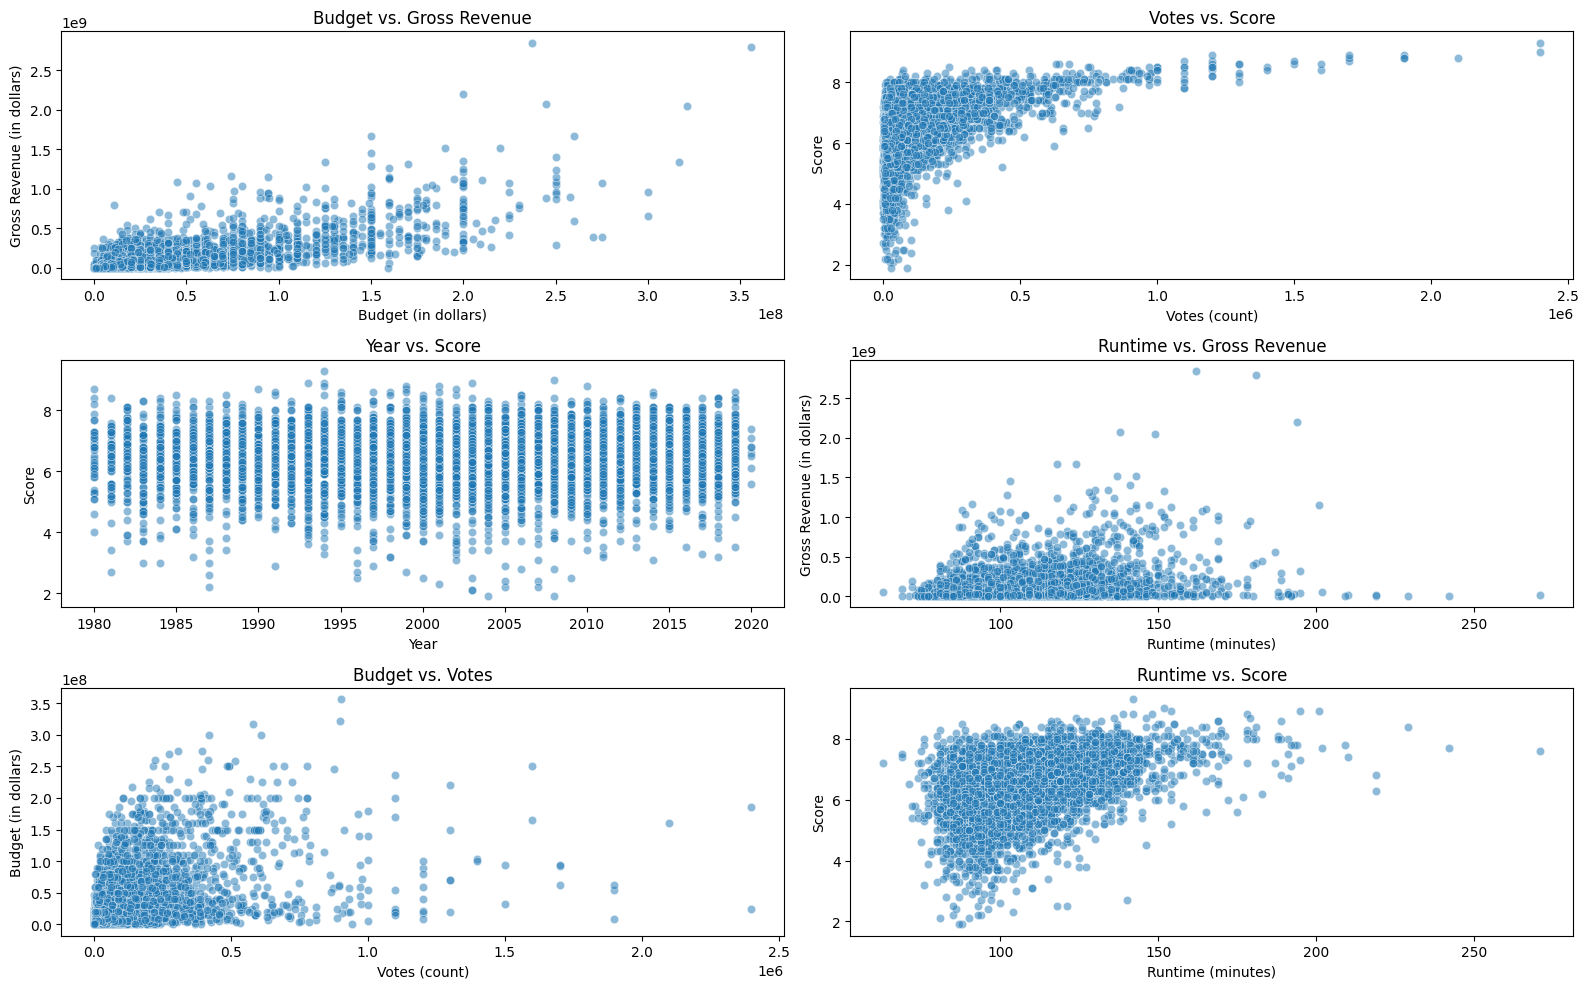

In [9]:

fig, axes = plt.subplots(3, 2, figsize=(16, 10))

# ScatterPlot 1 - Budget vs. Gross Revenue
sns.scatterplot(x=movies_df_cleaned["budget"], y=movies_df_cleaned["gross"], alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Budget vs. Gross Revenue")
axes[0, 0].set_xlabel("Budget (in dollars)")
axes[0, 0].set_ylabel("Gross Revenue (in dollars)")

# ScatterPlot 2 - Votes vs. Score
sns.scatterplot(x=movies_df_cleaned["votes"], y=movies_df_cleaned["score"], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Votes vs. Score")
axes[0, 1].set_xlabel("Votes (count)")
axes[0, 1].set_ylabel(" Score")

# ScatterPlot 3 - Year vs. Score
sns.scatterplot(x=movies_df_cleaned["year"], y=movies_df_cleaned["score"], alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Year vs. Score")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Score")

# ScatterPlot 4 - Runtime vs. Gross Revenue
sns.scatterplot(x=movies_df_cleaned["runtime"], y=movies_df_cleaned["gross"], alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Runtime vs. Gross Revenue")
axes[1, 1].set_xlabel("Runtime (minutes)")
axes[1, 1].set_ylabel("Gross Revenue (in dollars)")


# ScatterPlot 5 - Budget vs. Votes
sns.scatterplot(x=movies_df_cleaned["votes"], y=movies_df_cleaned["budget"], alpha=0.5, ax=axes[2, 0])
axes[2, 0].set_title("Budget vs. Votes")
axes[2, 0].set_xlabel("Votes (count)")
axes[2, 0].set_ylabel("Budget (in dollars)")

# ScatterPlot 6 - Runtime vs. Score
sns.scatterplot(x=movies_df_cleaned["runtime"], y=movies_df_cleaned["score"], alpha=0.5, ax=axes[2, 1])
axes[2, 1].set_title("Runtime vs. Score")
axes[2, 1].set_xlabel("Runtime (minutes)")
axes[2, 1].set_ylabel("Score")

plt.tight_layout()
plt.show()





---


## <span style="color:#0b486b">2. Heatmap


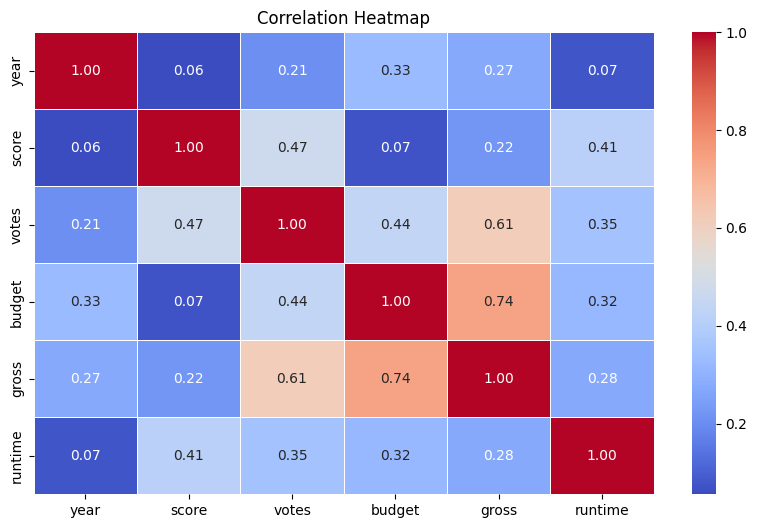

In [10]:
plt.figure(figsize=(10, 6))

numeric_df = movies_df_cleaned.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

---
## <span style="color:#0b486b">3. Pearson's-r Correlation coefficinet</span>


In [11]:
# Selecting numerical columns for correlation analysis
numeric_df = movies_df_cleaned[['year', 'score', 'votes', 'budget', 'gross', 'runtime']]

correlation_matrix = numeric_df.corr(method='pearson')

correlation_matrix


,year,score,votes,budget,gross,runtime
year,1.000000,0.055391,0.205852,0.327793,0.274354,0.074203
score,0.055391,1.000000,0.473789,0.071821,0.222100,0.414580
votes,0.205852,0.473789,1.000000,0.440035,0.614895,0.352437
budget,0.327793,0.071821,0.440035,1.000000,0.740410,0.318595
gross,0.274354,0.222100,0.614895,0.740410,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000




---


## <span style="color:#0b486b">4. Relationship between Runtime and Genre

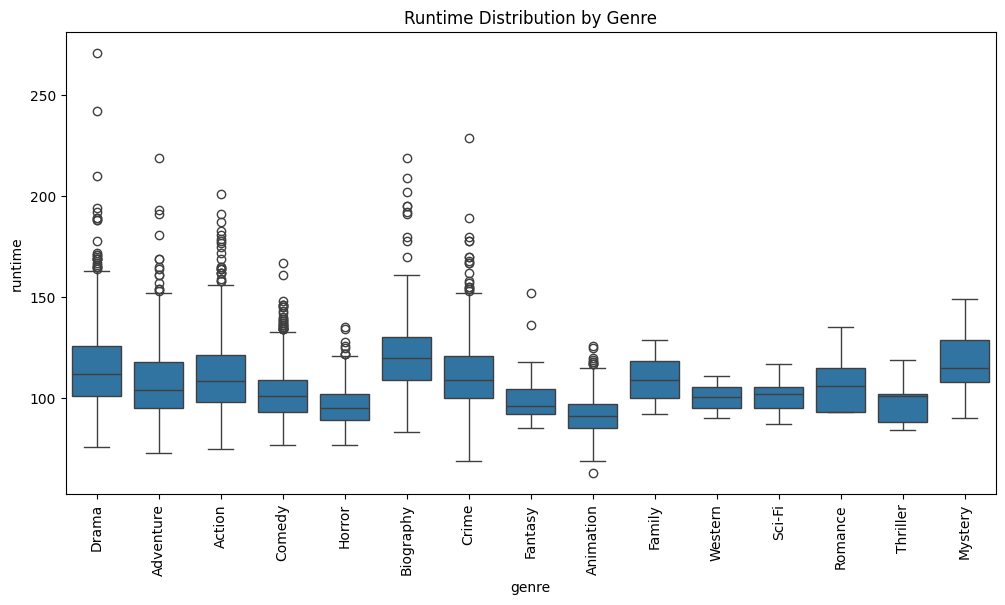

In [13]:
# Scatterplot: Genre vs. Runtime (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x="genre", y="runtime", data=movies_df_cleaned) # Changed df_cleaned to movies_df_cleaned
plt.xticks(rotation=90)
plt.title("Runtime Distribution by Genre")
plt.show()



---


## <span style="color:#0b486b">5. Relationship between Budget and Runtime

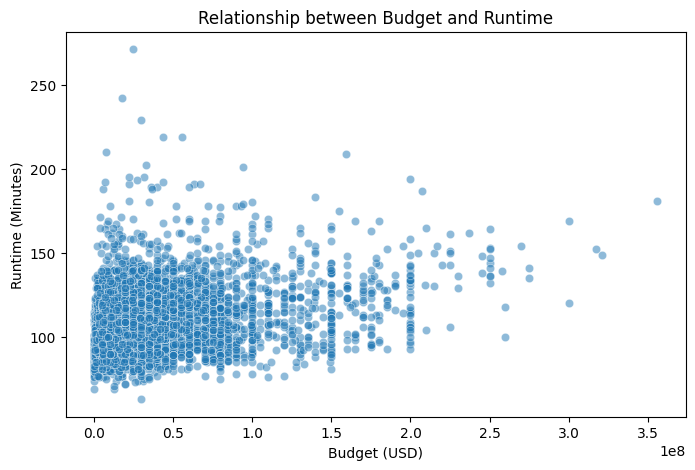

In [14]:
# Scatter plot- Budget vs. Runtime
plt.figure(figsize=(8, 5))
sns.scatterplot(x=movies_df_cleaned["budget"], y=movies_df_cleaned["runtime"], alpha=0.5)
plt.xlabel("Budget (USD)")
plt.ylabel("Runtime (Minutes)")
plt.title("Relationship between Budget and Runtime")
plt.show()

In [15]:
#Pearson's-r Correlation coefficinet -  Budget vs. Runtime
correlation_matrix = np.corrcoef(movies_df_cleaned.budget, movies_df_cleaned.runtime)
pearson_r = correlation_matrix[0, 1]

print(f"Pearson's r correlation coefficient: {pearson_r:.2f}")

Pearson's r correlation coefficient: 0.32




---


## <span style="color:#0b486b">6. Relationship between Genre and Country


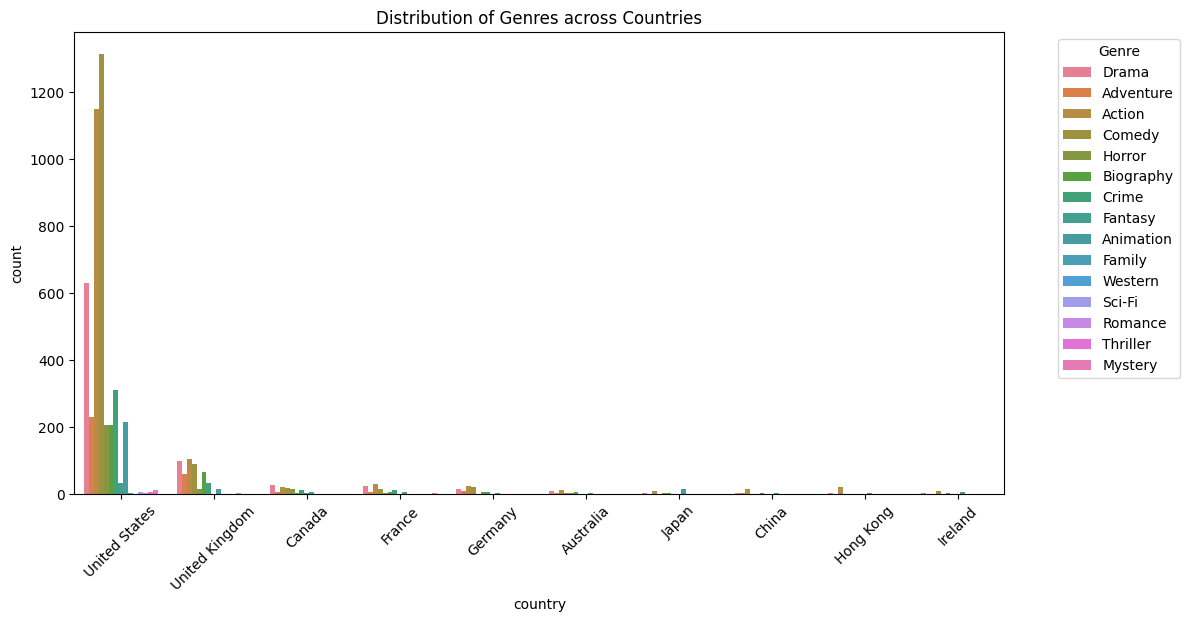

In [16]:
# Genre vs. Country (Countplot)
plt.figure(figsize=(12, 6))
top_countries = movies_df_cleaned["country"].value_counts().index[:10]  # top 10 countries
df_filtered = movies_df_cleaned[movies_df_cleaned["country"].isin(top_countries)]
sns.countplot(data=df_filtered, x="country", hue="genre", order=top_countries)
plt.xticks(rotation=45)
plt.title("Distribution of Genres across Countries")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()




---

